# The Spark Foundation

### Task 1 - Prediction using Supervised ML

#### By Harsh Vaswani

In [40]:
#Importing Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#Reading Data
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [42]:
#Preview
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
#Feature and Target
X=data.iloc[:,0:1]
y=data.iloc[:,1:]

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


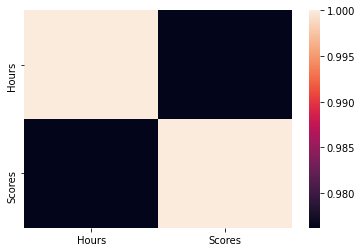

In [44]:
#Correlation between hours and scores
print(data.corr())
sns.heatmap(data.corr())
#With a correlation of 0.976191, positive correlation is visible, 
#which indicates that Hours and Scores highly depend on each other.

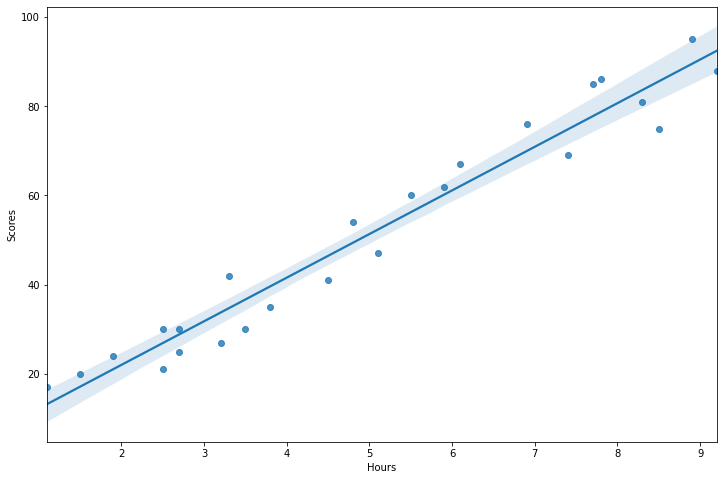

In [45]:
#Visualising Regression Line
plt.figure(figsize=(12,8))
sns.regplot(x=X, y=y)
#The graph represent relation between Scores and study hours. The regression line explains
#that with increase in study hours, there is an increase in score. This also checks out with
#general logic that studying more increases the exam score.

In [46]:
#To check model efficiency
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [47]:
#Checking accuracy score
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

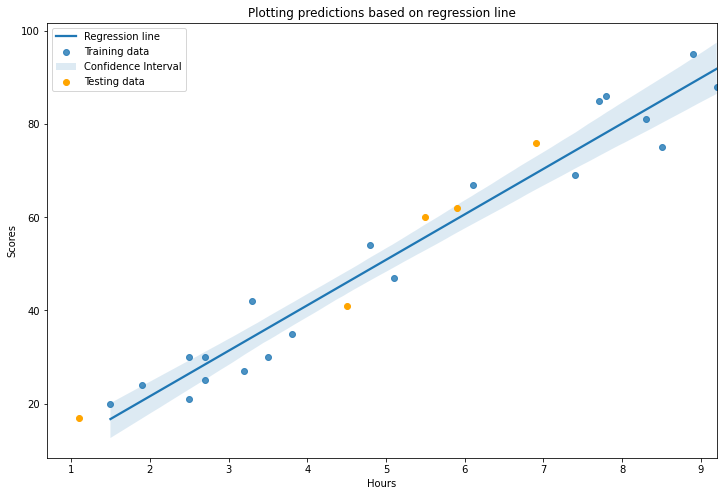

In [48]:
plt.figure(figsize=(12,8))
sns.regplot(x=X_train, y=y_train)
plt.scatter(X_test['Hours'],y_test['Scores'],color = '#FFA500')
plt.title("Plotting predictions based on regression line")
plt.legend(['Regression line','Training data','Confidence Interval','Testing data'])

In [49]:
#Model description and errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score

print("Score:",model.score(X_test, y_test))
split_pred=model.predict(X_test)
print("Mean absolute error: ",mean_absolute_error(y_test, split_pred))
print("Mean squared error: ",mean_squared_error(y_test, split_pred))
print("Root mean squared error: ",sqrt(mean_squared_error(y_test, split_pred)))
print("R squared: ",cross_val_score(model, X, y,scoring='r2'))

Score: 0.9474167330048234
Mean absolute error:  4.474971762473453
Mean squared error:  21.904085699510745
Root mean squared error:  4.680180092636473
R squared:  [0.78626426 0.97891923 0.93182467 0.96604831 0.9273292 ]


In [50]:
#Fitting model with complete data and predciting
model.fit(X,y)
preds=model.predict([[9.25]])

In [51]:
ans=preds[0][0]
print("Predicted score if a student studies for 9.25 hrs/ day will be",ans)

Predicted score if a student studies for 9.25 hrs/ day will be 92.9098547701573


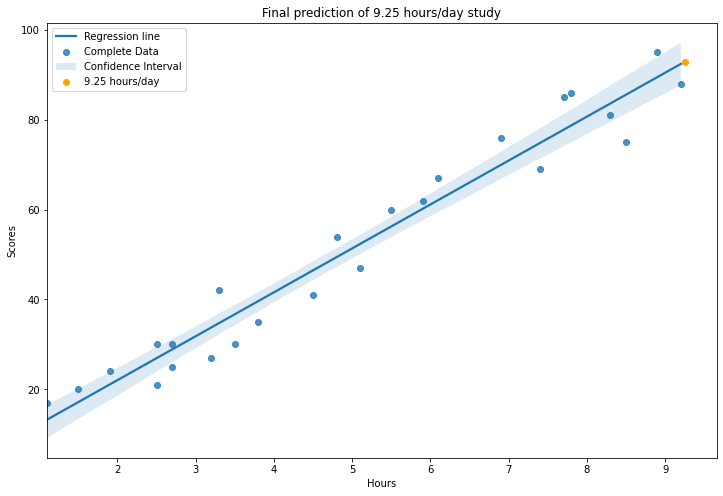

In [52]:
plt.figure(figsize=(12,8))
sns.regplot(x=X, y=y)
plt.scatter([[9.25]],preds,color = '#FFA500')
plt.title("Final prediction of 9.25 hours/day study")
plt.legend(['Regression line','Complete Data','Confidence Interval','9.25 hours/day'])

### Predicted score if a student studies for 9.25 hrs/ day will be 92.9098547701573